In [2]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 6.4 MB/s 
     |████████████████████████████████| 448 kB 53.3 MB/s 


In [3]:
import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.6.0
3.6.0
1.0.2
0.11.2


## 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [4]:


with open('/content/drive/MyDrive/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [5]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open('/content/drive/MyDrive/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)



In [6]:
print(len(tokenized))

71156


## 2. 추출된 결과로 embedding model 만들기

In [8]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 3.X기준)

model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
model.most_similar(positive=['영화'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('작품', 0.8976331353187561),
 ('다큐멘터리', 0.8543121814727783),
 ('드라마', 0.8450857400894165),
 ('코미디', 0.8123298287391663),
 ('영화로', 0.8121116757392883),
 ('츠치모토', 0.7948884963989258),
 ('주제', 0.7896630167961121),
 ('감동', 0.7880445718765259),
 ('소재', 0.7802477478981018),
 ('실화', 0.778844952583313)]

In [9]:
model.most_similar(positive=['사랑'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('진심', 0.7223649024963379),
 ('첫사랑', 0.7195370197296143),
 ('만인', 0.7187661528587341),
 ('우정', 0.7147269248962402),
 ('이별', 0.7146782279014587),
 ('토마슈', 0.7127225399017334),
 ('시빌라', 0.7097005248069763),
 ('애정', 0.7093098163604736),
 ('만남', 0.7077370882034302),
 ('고백', 0.7024588584899902)]

## 3. target, attribute 단어 셋 만들기

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
def read_token(file_name):
    okt = Okt()
    result = []
    with open('/content/drive/MyDrive/synopsis/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [14]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [19]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [203]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [22]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

24574
여권


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [204]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 300):
        if vectorizer.get_feature_names()[w[i][j][0]] in model:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]


자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 외계, 존재, 세상, 발견, 행성, 정체, 친구, 비밀, 사실, 기억, 전쟁, 사건, 시간, 공격, 영화, 한편, 실험, 능력, 시스템, 위협, 생명체, 정부, 아들, 사고, 스타크, 리플리, 과학자, 음모, 파괴, 아버지, 켈빈, 컨트, 모두, 수퍼맨, 임무, 발생, 가족, 요원, 죽음, 다시, 위기, 과거, 외계인, 도시, 이제, 갑자기, 상황, 운명, 분파, 불명, 연구, 개발, 때문, 탈출, 명의, 의문, 남자, 아이, 현실, 바이러스, 상어, 물체, 진화, 목숨, 최후, 통해, 프로젝트, 수트, 생존, 과연, 사랑, 히노키, 섹터, 미국, 여행, 대원, 멸망, 조직, 바로, 위험, 사이, 세력, 감염, 괴물, 거대, 계속, 이상, 마을, 다른, 대한, 이자, 하나, 유성, 무기, 일본, 토니, 슈퍼, 통제, 아내, 데이빗, 토네이도, 상태, 모습, 거미, 최고, 계획, 점점, 군단, 무차별, 공룡, 생각, 로부터, 혼란, 살인, 소녀, 치티, 라임, 에일리언, 강두, 영건, 미노스, 범죄, 돌연변이, 유전자, 주인공, 순간, 도움, 동료, 더욱, 마지막, 조사, 추적, 게임, 운석, 지배, 마토, 지능, 생물체, 영화제, 공포, 방법, 물질, 어둠, 회사, 탐사, 특수, 간다, 가장, 국제, 송현, 앤더, 디셉티콘, 도니, 진행, 경찰, 아이언맨, 시도, 이동, 뉴욕, 폭발, 위저드, 블랙옥스, 인공, 사투, 에너지, 이용, 이야기, 마침내, 초능력, 천재, 희망, 스카이, 기지, 감옥, 괴생명체, 화산, 전투, 찾기, 이유, 감정, 도착, 레아, 등장, 현상, 컴퓨터, 클라크, 플래시, 은하계, 상상, 충격, 누군가, 폭풍, 단서, 안나, 가지, 이후, 조종, 젠슨, 네크로몬거, 오토봇, 잔해, 초인, 기계, 파견, 미스터리, 소년, 우즈, 초능력자, 우주인, 타임머신, 원인, 연구소, 전체, 복수, 서로, 제브라맨, 써로게이트, 제크, 게릴라군, 

In [207]:
import itertools
sum = []
target = []
for i in range(len(attributes)):
    for j in range(len(attributes)):
        if i == j: continue
        sum.append(attributes[j])
    sum = list(itertools.chain.from_iterable(sum))
    att = list(set(attributes[i])-set(sum))
    att = att[:15]
    target.append(att)    





In [208]:
for i in range(len(target)):
    print(genre_name[i], end=': ')
    print(target[i])

SF: ['스카이', '돌연변이', '은하계', '진화', '마토', '법안', '인공', '케이', '울트라맨', '젠슨', '어니스트', '아이언맨', '윌리엄', '제브라맨', '미노스']
가족: ['승혁', '레슨', '펠릭스', '타일러', '물리학', '마들렌', '산타클로스', '파코', '그레고리', '케이시', '브룩스', '양씨', '해나', '펠리칸', '막내']
공연: ['필레', '로돌포', '스트로', '유로파', '표트르', '발트뷔네', '칼라', '리골레토', '피오르', '잘츠부르크', '카라', '축제', '부관', '교향곡', '프레데릭']
공포(호러): ['그때', '레드', '구역', '레스태트', '노파', '신부', '레이첼', '인적', '고립', '공포영화', '환영', '지미', '분홍신', '설명', '두운']
기타: ['독도', '사운드', '지하철', '공사', '자전거', '교통', '에르나니', '집착', '재연', '소통', '실험영화', '메트로', '발달장애', '완섭', '뉴미디어']
다큐멘터리: ['활동', '아티스트', '영화감독', '조명', '중심', '성소수자', '지난', '농성', '세월호', '편견', '개인', '영향', '세대', '인권', '현대']
드라마: ['포기', '아시아', '살의', '의지']
멜로로맨스: ['준석', '유진', '며느리', '치한', '하숙집', '하숙', '키스', '나오키', '파격', '호감', '우연', '처제', '지수', '정식', '석호']
뮤지컬: ['성당', '캬바레', '조아킴', '원형', '물탱크', '발각', '데이비', '막걸리', '연화', '갈증', '외설', '샤오캉', '키다리', '젤리', '라프']
미스터리: ['민수현', '광수', '알리바이', '승호', '취재', '미리엄', '영식', '린코', '원작', '블랙', '방독면', '미제', '종섭', '시엘', '퍼시']
범죄: ['감시', '매티', '미네

## 4. WEAT score 계산과 시각화

In [209]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [211]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T) / (norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)
    
    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return (mean_X - mean_Y) / std_dev

In [215]:
X = np.array([model.wv[word] for word in attributes[0]])
Y = np.array([model.wv[word] for word in attributes[1]])

for i in range(2,len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")
        



슝~


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


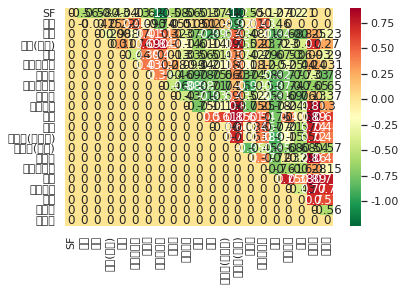

In [217]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt


np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax